# Taxi Fare Prediction Analysis
In this project, we look at fare prediction using linear regression. The data in contains fare prices paid during taxi trips and was obtained from kaggle. https://www.kaggle.com/datasets/raviiloveyou/predict-taxi-fare-with-a-bigquery-ml-forecasting
The variables in the dataset are: 
1. **trip_duration** : Time travelled during the trip in secconds
2. **distance_travelled** : Distance travelled during the trip
3. **fare** : Amount charged for the trip
4. **tip** : Amount of tip paid by the passenger
5. **miscellaneous**: Additional costs to the trip
6. **total_fare** : Final amount paid by the passenger
7. **surge_applied** : Categorical variable for yes no if surge was applied during the trip
8. **num_of_passengers** : How many passengers were in the taxi?

## Import Relevant Packages

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

## Import the data

In [3]:
taxi = pd.read_csv('train.csv')

## Exploratory Data Analysis

### Describing the data

In [4]:
taxi.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [5]:
taxi.info

<bound method DataFrame.info of         trip_duration  distance_traveled  num_of_passengers    fare  tip  \
0               748.0               2.75                1.0   75.00   24   
1              1187.0               3.43                1.0  105.00   24   
2               730.0               3.12                1.0   71.25    0   
3               671.0               5.63                3.0   90.00    0   
4               329.0               2.09                1.0   45.00   12   
...               ...                ...                ...     ...  ...   
209668         1617.0               8.42                1.0  150.00   47   
209669          438.0               1.29                1.0   48.75   12   
209670          571.0               2.82                1.0   63.75    0   
209671          491.0               2.16                1.0   56.25    0   
209672         3614.0              33.72                1.0  337.50    0   

        miscellaneous_fees  total_fare  surge_applied  

In [6]:
# Summary Statistics
taxi.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


### Visualization

In [7]:
# Cheking for missing data
taxi.isnull()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
209668,False,False,False,False,False,False,False,False
209669,False,False,False,False,False,False,False,False
209670,False,False,False,False,False,False,False,False
209671,False,False,False,False,False,False,False,False


<AxesSubplot:>

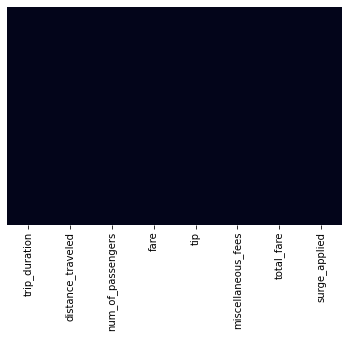

In [8]:
sns.heatmap(taxi.isnull(), yticklabels=False, cbar =False)

No missing records

<AxesSubplot:>

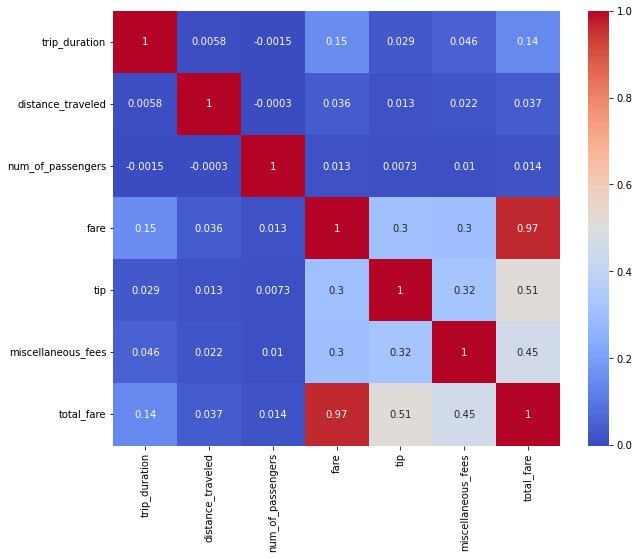

In [9]:
# Correlation plot
plt.figure(figsize=(10, 8))
num_vars = taxi.drop('surge_applied', axis = 1)
sns.heatmap(num_vars.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='total_fare', ylabel='Count'>

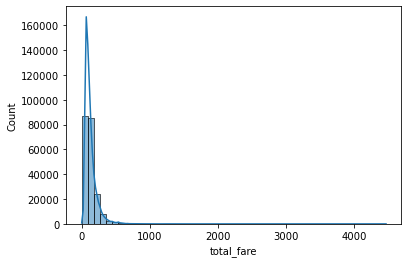

In [10]:
sns.histplot(taxi['total_fare'], kde = True, bins = 50)

Text(0.5, 1.0, 'Total Fare paid against whether surge was applied')

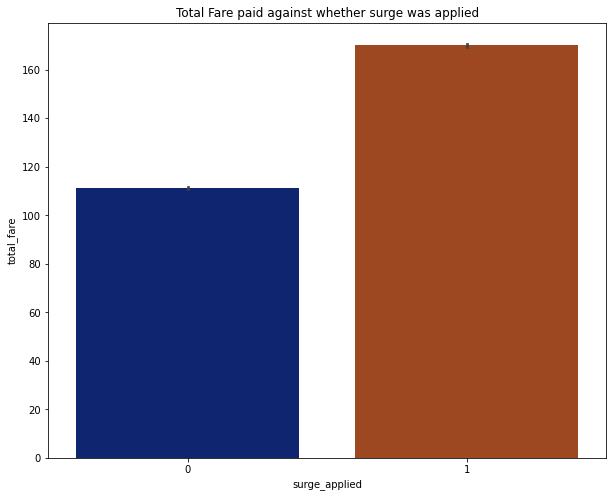

In [11]:
plt.figure(figsize=(10, 8))
sns.barplot(data = taxi, y = 'total_fare', x = 'surge_applied', palette = 'dark')
plt.title("Total Fare paid against whether surge was applied")

## Linear Regression

In [13]:
taxi.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

### Preparing the data for regression
Setting X and Y variables
Splititng into train and test set ratio - 70-30

In [14]:
# Setting X and Y
X = taxi[['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees', 'surge_applied']]
y = taxi['total_fare']

In [18]:
# Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Linear Regression Model Building

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train , y_train)

LinearRegression()

In [22]:
lm.intercept_

-2.842170943040401e-14

In [23]:
lm.coef_

array([ 3.73222675e-17,  4.22920327e-16, -3.44767077e-15,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00, -3.02346724e-15])

In [25]:
coefficients = pd.DataFrame(data = lm.coef_, index = X_train.columns, columns = ['Coefficients'])
coefficients

,Coefficients
trip_duration,3.732227e-17
distance_traveled,4.229203e-16
num_of_passengers,-3.447671e-15
fare,1.000000e+00
tip,1.000000e+00
miscellaneous_fees,1.000000e+00
surge_applied,-3.023467e-15


When all predictors are constant at zero, the base fare is -2.8. This does not have any significant intepretation

Unit increment in tip, fare trip duration and distance travel increases the total fare by the unit shown in the table above. 
However, unit increase in  the number of passengers results to a decrease in total fare by -3.4e-15 units. 

### Model Assessment
1. Comparing with y_test with predictions
2. Using metrics - Mean square error and root mean square error

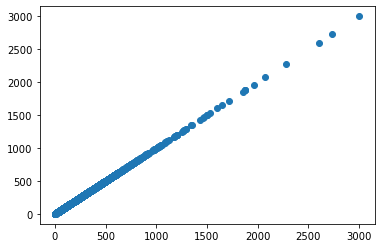

In [26]:
Predictions = lm.predict(X_test)
plt.scatter(y_test, Predictions)

The model is a perfect predictor

<AxesSubplot:xlabel='total_fare', ylabel='Count'>

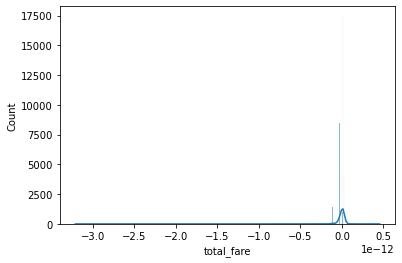

In [29]:
sns.histplot((y_test - Predictions), kde = True)

In [30]:
from sklearn import metrics

In [31]:
metrics.mean_absolute_error(y_test, Predictions)

2.890008724337554e-14

In [32]:
metrics.mean_squared_error(y_test, Predictions)

2.912004470283322e-26

In [33]:
np.sqrt(metrics.mean_squared_error(y_test, Predictions))

1.7064596304288368e-13

All metrics are low